In [ ]:
import json
import pandas as pd
import h5py
import numpy as np
import tensorflow as tf
import keras
from keras.layers import Input, Dense, Dropout, LSTM, Flatten, GRU,TimeDistributed, Conv1D
from keras.models import Model, Sequential
from keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
import os
import h5py
import matplotlib.pyplot as plt
from keras import regularizers
from tensorflow.keras.regularizers import l1
import ast
from tqdm import tqdm
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import loguniform
from pandas import read_csv
from keras.wrappers.scikit_learn import KerasClassifier

In [5]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [6]:
X_train = np.load('/drive/Shareddrives/Jet Classification/Data/Quickdraw/X_train.npy', allow_pickle=True)
X_test = np.load('/drive/Shareddrives/Jet Classification/Data/Quickdraw/X_test.npy', allow_pickle=True)
y_train = np.load('/drive/Shareddrives/Jet Classification/Data/Quickdraw/y_train.npy', allow_pickle=True)
y_test = np.load('/drive/Shareddrives/Jet Classification/Data/Quickdraw/y_test.npy', allow_pickle=True)

In [7]:
X_train.shape

(549509,)

In [8]:
X_trainzero = np.zeros((549509,100,3))

In [21]:

for x in tqdm(range(len(X_train))):
  for y in range(100):
    for z in range(3):
      if y >= len(X_train[x]):
        break
      else:
        X_trainzero[x][y][z] = X_train[x][y][z]

100%|██████████| 549509/549509 [02:27<00:00, 3717.73it/s]


In [28]:
y_labhot = np.zeros((len(y_train),5))

In [30]:
y_labhot.shape

(549509, 5)

In [33]:
num = 0
for x in y_train:
  if x == 0:
    y_labhot[num][0] = 1
  elif x == 1: 
    y_labhot[num][1] = 1
  elif x == 2: 
    y_labhot[num][2] = 1
  elif x == 3: 
    y_labhot[num][3] = 1
  elif x == 4: 
    y_labhot[num][4] = 1
  num = num + 1

In [34]:
y_labhot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

# Training

In [58]:
shuffler = np.random.permutation(len(X_trainzero))
array1_shuffled = X_trainzero[shuffler]
array2_shuffled = y_labhot[shuffler]

In [46]:
x, y = unison_shuffled_copies(X_trainzero,y_labhot)

In [54]:
x

<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'lstm_11')>

In [51]:
Inputs = Input(shape = (100,3))
x = Conv1D(128,(6),activation='relu')(Inputs)
x = Conv1D(64,(3),activation='relu')(x)
x = Conv1D(1, (1), activation='relu')(x)
x = LSTM(128, return_sequences=True)(x)
x = LSTM(64, return_sequences=False)(x)
predictions = Dense(5, activation='softmax', kernel_initializer='lecun_uniform', name='rnn_densef')(x)
model = Model(inputs=Inputs, outputs=predictions)

model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 100, 3)]          0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 95, 128)           2432      
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 93, 64)            24640     
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 93, 1)             65        
_________________________________________________________________
lstm_10 (LSTM)               (None, 93, 128)           66560     
_________________________________________________________________
lstm_11 (LSTM)               (None, 64)                49408     
_________________________________________________________________
rnn_densef (Dense)           (None, 5)                 325 

In [52]:
adam = Adam(lr = 0.002)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
history = model.fit(array1_shuffled, array2_shuffled, batch_size = 256, epochs = 15, 
                    validation_split = 0.1, shuffle = True, callbacks = None,
                    use_multiprocessing=True, workers=4)

Epoch 1/15
1932/1932 [==============================] - 41s 21ms/step - loss: 0.2063 - accuracy: 0.9254 - val_loss: 0.2121 - val_accuracy: 0.9243
Epoch 2/15
1932/1932 [==============================] - 41s 21ms/step - loss: 0.1980 - accuracy: 0.9286 - val_loss: 0.2054 - val_accuracy: 0.9268
Epoch 3/15
1932/1932 [==============================] - 41s 21ms/step - loss: 0.1912 - accuracy: 0.9307 - val_loss: 0.1993 - val_accuracy: 0.9293
Epoch 4/15
1932/1932 [==============================] - 41s 21ms/step - loss: 0.1849 - accuracy: 0.9333 - val_loss: 0.2020 - val_accuracy: 0.9278
Epoch 5/15
1932/1932 [==============================] - 41s 21ms/step - loss: 0.1807 - accuracy: 0.9346 - val_loss: 0.1954 - val_accuracy: 0.9296
Epoch 6/15
1932/1932 [==============================] - 41s 21ms/step - loss: 0.1756 - accuracy: 0.9364 - val_loss: 0.1924 - val_accuracy: 0.9304
Epoch 7/15
1932/1932 [==============================] - 41s 21ms/step - loss: 0.1701 - accuracy: 0.9384 - val_loss: 0.1954 -

In [76]:
X_testzero = np.zeros((len(X_test),100,3))

In [77]:
X_testzero[0][0][0]

0.0

In [78]:

for x in tqdm(range(len(X_test))):
  for y in range(100):
    for z in range(3):
      if y >= len(X_test[x]):
        break
      else:
        X_testzero[x][y][z] = X_test[x][y][z]

100%|██████████| 12500/12500 [00:03<00:00, 3815.50it/s]


In [79]:
y_tlabhot = np.zeros((len(y_test),5))

In [80]:
num = 0
for x in y_test:
  if x == 0:
    y_tlabhot[num][0] = 1
  elif x == 1: 
    y_tlabhot[num][1] = 1
  elif x == 2: 
    y_tlabhot[num][2] = 1
  elif x == 3: 
    y_tlabhot[num][3] = 1
  elif x == 4: 
    y_tlabhot[num][4] = 1
  num = num + 1

In [81]:
import matplotlib.pyplot as plt


In [82]:
def learningCurve(history):
    plt.figure(figsize=(10,8))
    plt.plot(history.history['loss'], linewidth=1)
    plt.plot(history.history['val_loss'], linewidth=1)
    plt.title('Model Loss over Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['training sample loss','validation sample loss'])
    #plt.savefig('Learning_curve.pdf')
    plt.show()
    plt.close()

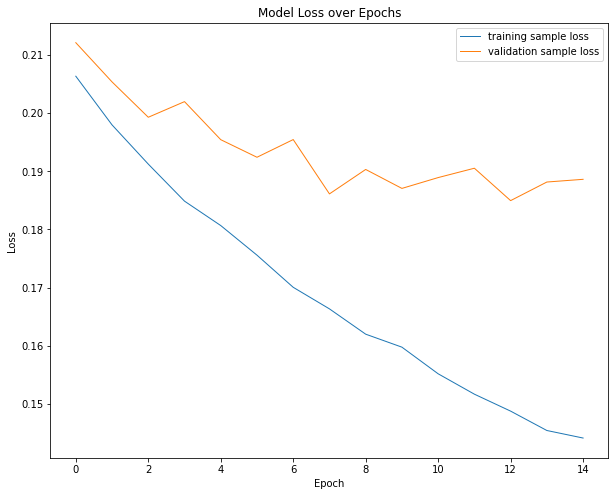

In [83]:
learningCurve(history)

In [84]:
labels = ['ant', 'bee', 'butterfly', 'mosquito']


In [85]:
def makeRoc(features_val, labels_val, labels, model, outputDir='', outputSuffix=''):
    from sklearn.metrics import roc_curve, auc
    labels_pred = model.predict(features_val)
    df = pd.DataFrame()
    fpr = {}
    tpr = {}
    auc1 = {}
    plt.figure(figsize=(10,8))       
    for i, label in enumerate(labels):
        if i==5:
            break
        df[label] = labels_val[:,i]
        df[label + '_pred'] = labels_pred[:,i]
        fpr[label], tpr[label], threshold = roc_curve(df[label],df[label+'_pred'])
        auc1[label] = auc(fpr[label], tpr[label])
        plt.plot(fpr[label],tpr[label],label='%s tagger, AUC = %.1f%%'%(label.replace('j_',''),auc1[label]*100.))
        
    plt.plot([0, 1], [0, 1], lw=1, color='black', linestyle='--')
    #plt.semilogy()
    plt.xlabel("Background Efficiency")
    plt.ylabel("Signal Efficiency")
    plt.xlim([-0.05, 1.05])
    plt.ylim(0.001,1.05)
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.figtext(0.25, 0.90,'GRU ROC Curve',fontweight='bold', wrap=True, horizontalalignment='right', fontsize=14)
    #plt.figtext(0.35, 0.90,'preliminary', style='italic', wrap=True, horizontalalignment='center', fontsize=14) 
    #plt.savefig('%sROC_%s.pdf'%(outputDir, outputSuffix))
    return labels_pred

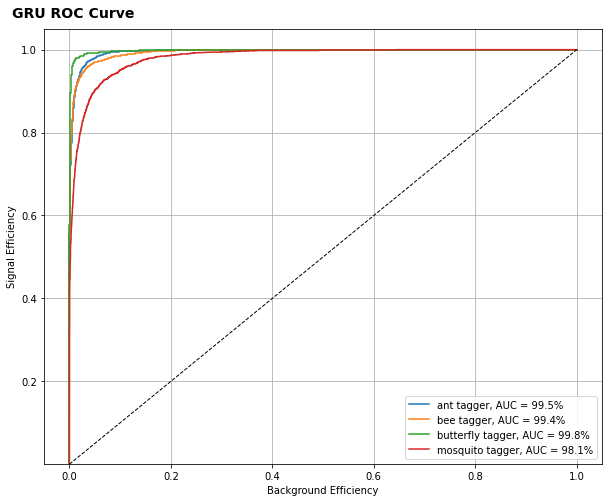

In [87]:
y_pred = makeRoc(X_testzero, y_tlabhot, labels, model, outputSuffix='two-layer')
